Anime Recommender Project

Libraries 

In [2]:
# For Dataframe, and analysis
import pandas as pd
import numpy as np

# For Visualization 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [3]:
anime_df = pd.read_csv('anime.csv')
# rating_df = pd.read_csv('rating.csv')

print(anime_df)
# print(rating_df)

       anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      

Info

In [ ]:
pd.read_csv(‘file.csv’, header=None, nrows=5) #read x amount of rows 
df.to_csv('myDataFrame.csv') # write to csv

df.drop("country", axis=1) # Drop certain rows from a column
df.sort_values(by="Country") # Sort values by column 
df.rank() # Assign rank to entries

df[-1] # can slice/index dataframes 
df[1:] # get subsets of information (muiltiple rows)

df.iloc[[0],[0]] # Select single value by row & column

df.loc[[0], ['Country']] # Get valeue by row# and column name 
df.ix[2] #Select single row of subset of rows]

## Getting the shape and description of dataframe, basic info
df.shape #(rows,columns)
df.index #Describe index
df.columns #Describe DataFrame columns
df.info() #Info on DataFrame
df.count() #Number of non-NA values

## math operations and analysis 
df.sum() #Sum of values
df.cumsum() #Cummulative sum of values
df.min()/df.max() #Minimum/maximum values
df.idxmin()/df.idxmax() #Minimum/Maximum index value
df.describe() #Summary statistics
df.mean() #Mean of values
df.median() #Median of values

# Getting info
f = lambda x: x*2
df.apply(f) # How to use the function 
df.applymap(f) # How to apply 


Functionality:
    -prints out a list of ALL genres for the user to see
    -prompt the user to choose 1 genre that they are interested in
    -prompt the user to choose between:
        -TOP 5 animes in the genre of their choosing
        -5 random animes in the genre of their choosing
    -returns back a list of those 5 animes to the user
    -also returns 1 fun fact to the user 
        -which can be an analysis from the questions below  

Questions:
    easy:
        -find the top 5 anime in the genre 'Supernatural' by rating
        -find the worst 5 anime in the genre 'Action' by rating
        -anime with the least amount of episodes
        -anime with the most amount of episodes
        -# of tv shows vs. # of movies vs. # of OVA
        -most common word in the name
        -title with the longest name
    hard:
        -is there a correlation between the length of an anime's name and number of members
            ex: if a name is too long, would it make someone uninterested in watching it
        -is there a correlation between the number of genres and the number of members
            ex: if there are more genres, will it attract more users
        

Momo
What are the top 5 anime in the genre 'Supernatural' by rating?
-# of tv shows vs. # of movies vs. # of OVA
-anime with the most amount of episodes
-is there a correlation between the number of genres and the number of members
  ex: if there are more genres, will it attract more users

[Text(0, 0, 'Kimi no Na wa.'),
 Text(1, 0, 'Clannad: After Story'),
 Text(2, 0, 'Sen to Chihiro no Kamikakushi'),
 Text(3, 0, 'Mushishi Zoku Shou 2nd Season'),
 Text(4, 0, 'One Punch Man'),
 Text(5, 0, 'Suzumiya Haruhi no Shoushitsu'),
 Text(6, 0, 'Monogatari Series: Second Season'),
 Text(7, 0, 'Mushishi Zoku Shou'),
 Text(8, 0, 'Mushishi'),
 Text(9, 0, 'Natsume Yuujinchou Go')]

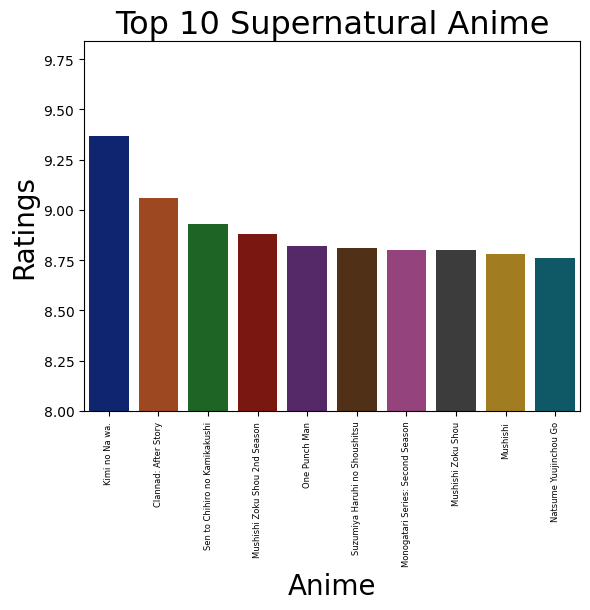

In [121]:
# What are the top 10 anime in the genre 'Supernatural' by rating?
# We should look into the anime dataframe and filter for supernatural genre. I know I can use .head(5) to display the top 5 
supernatural=(anime_df["genre"].apply(lambda x: "Supernatural" in str(x)))
anime_df[supernatural].sort_values("rating", ascending=False).head(10)

# Creating a Bar Chart using Seaborn
anime_supernatural = anime_df[supernatural].sort_values("rating", ascending=False).head(10)
set_ax= sns.barplot(x="name", y="rating", data=anime_supernatural, palette="dark")

# Setting the y range from 8 onwards, Setting the axis and title labels
set_ax.set_ylim(8)
set_ax.set_title("Top 10 Supernatural Anime", fontsize=23)
set_ax.set_xlabel("Anime", fontsize=20)
set_ax.set_ylabel("Ratings", fontsize=20)

# Formatting and rotating the x tick labels for better viewing
set_ax.set_xticklabels(set_ax.get_xticklabels(), fontsize=6, rotation=90)


In [ ]:
# Find # of tv shows vs. # of movies vs. # of OVA
type_df=anime_df['type'].value_counts()
print("# of TV Shows: {} vs # of Movies: {} vs # of OVA: {}".format(type_df["TV"], type_df["Movie"], type_df["OVA"]))



In [ ]:
# What is the anime with the most amount of episodes
# Check if the anime is either a TV show or OVA and if there is 1 or more episodes 
# Sort in descending order and get the top 5 rows 
type_anime=(anime_df["type"].isin(["TV", "OVA"]) & anime_df["episodes"] >0)
anime_df[type_anime].sort_values("episodes", ascending=False).head(5)



Jon 
-find the worst 5 anime in the genre 'Action' by rating
        -anime with the least amount of episodes
        -most common word in the name
        -is there a correlation between the length of an anime's name and number of members
            ex: if a name is too long, would it make someone uninterested in watching it

In [ ]:
#### find the worst 5 anime in the genre 'Action' by rating
# filter by genre
action = anime_df['genre'].apply(lambda x: "Action" in str(x))
worst_animes = anime_df[action].sort_values('rating').head(10)
# bar graph
ax = sns.barplot(x='name', y='rating', data=worst_animes)
ax.set_title('10 Worst Action Animes', fontsize=23)
ax.set_xlabel('Anime', fontsize=20)
ax.set_ylabel('Rating', fontsize=20)
ax.set_ylim(1)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=6, rotation=90)

In [ ]:
#### 10 anime with the least amount of episodes
ova = anime_df['type'].isin(['OVA'])
anime_df[ova].sort_values('episodes').head(10)

In [ ]:
#### 10 anime with the least amount of episodes
tv = (anime_df['type'].isin(['TV']))
anime_df[tv].sort_values('episodes').head(10)

In [ ]:
#### most common word in the name
# includes uninteresting words though (which is NOT good) 
pd.Series(' '.join(anime_df['name']).lower().split()).value_counts()[:100]

In [ ]:
#### find the ratings percentile - ova, tv, movie
# filter out NaN
filter_nan = anime_df['rating'].notnull()
# sort by rating
df = anime_df[filter_nan].sort_values('rating', ascending=False)
# filter by type
ova = anime_df['type'].isin(['OVA'])
tv = anime_df['type'].isin(['TV'])
movie = anime_df['type'].isin(['Movie'])
# create seperate df based on type
ova_df = df[ova]
tv_df = df[tv]
movie_df = df[movie]

#-----------------------------------------------
# ova_df.head(1) # highest - 9.25
# ova_df.tail(1) # lowest - 2.0
# ax = sns.boxplot(data=ova_df, y='rating')
# ax.set_title('OVA', fontsize=22)

# tv_df.head(1) # highest - 9.6
# tv_df.tail(1) # lowest - 2.67
# ax = sns.boxplot(data=tv_df, y='rating')
# ax.set_title('TV', fontsize=22)

# movie_df.head(1) # highest - 10
# movie_df.tail(1) # lowest - 1.92
# ax = sns.boxplot(data=movie_df, y='rating')
# ax.set_title('Movie', fontsize=22)
#-----------------------------------------------

# create new column
ova_df['anime_type'] = 'ova'
tv_df['anime_type'] = 'tv'
movie_df['anime_type'] = 'movie'
# concat all df
dfs = [ova_df, tv_df, movie_df]
all_df = pd.concat(dfs)
# boxplot graph
ax = sns.boxplot(x='anime_type', y='rating', data=all_df)
ax.set_title('Rating Percentiles', fontsize=23)
ax.set_xlabel('Anime Type', fontsize=20)
ax.set_ylabel('Rating', fontsize=20)